# Insertion Sort
## Sort function

In [1]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

In [2]:
def in_sort(A,aLen):
    for i in range(1,aLen):
        temp = A[i];
        j=i-1;
        while(temp<A[j] and j>=0):
            A[j+1]=A[j]
            j-=1
        A[j+1]=temp
    return A

#Modified version, returns steps and comparisons
def in_sort_Mod(A,aLen):
    #init counters
    steps,comps,swaps = 0,0,0
    t=np.zeros(aLen,dtype=int)
    i = 1
    while(i<aLen):
        temp = A[i]
        j=i-1
        while(True):
            comps+=1
            t[i]+=1
            if(j<0):break
            if(temp>=A[j]):break
            swaps+=1
            A[j+1]=A[j]
            j-=1;steps+=3
        A[j+1]=temp;steps+=1;
        i+=1;steps+=4
    steps+=1
    return A,steps,comps,swaps,t

Here we test the function:

In [3]:
A = np.array([0,5,1,3,4,7,9])
print('A > ',A)
print('ordered A > ',in_sort(A,len(A)))

A >  [0 5 1 3 4 7 9]
ordered A >  [0 1 3 4 5 7 9]


### Steps distribution

In [4]:
#custom function - calc steps
def calc(n):
    #Generate permutations lenght n
    perm = np.array(list(itertools.permutations(range(n))))
    n_perm = len(perm)
    
    pasos = np.empty(n_perm)
    comparaciones = np.empty(n_perm)
    sw = np.empty(n_perm)
    t_loop=np.empty([n_perm,n])
    for i in range (n_perm):
        tm = np.copy(perm[i])
        A,steps,comps,swaps,t = in_sort_Mod(tm,n)
        pasos[i]=steps
        comparaciones[i]=comps
        sw[i]=swaps
        t_loop[i] = t
    return pasos,comparaciones,sw,t_loop,perm,n_perm

#Call the function
n = 3
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(n)

### Histogram Functions:

In [5]:
def step_hist(pasos,n_perm):
    min_steps,max_steps=min(pasos), max(pasos)
    plt.hist(pasos, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density - n = "+str(n))
    plt.xlabel('Steps')
    plt.ylabel('Probaility')
    plt.show()

    #raw data
    vals,counts = np.unique(pasos,return_counts=True)
    print("\nAverage Steps: "+str(np.average(pasos)), "- Min Steps: "+str(min_steps),"- Max Steps: "+str(max_steps))
    print("Probabilities: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))
def comp_hist(comparaciones,n_perm):
    #histogram comparisons
    min_steps,max_steps=min(comparaciones), max(comparaciones)
    plt.hist(comparaciones, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density Comparisons - n = "+str(n))
    plt.xlabel('n-comparisons')
    plt.ylabel('Probaility')
    plt.show()

    #raw data
    vals,counts = np.unique(comparaciones,return_counts=True)
    print("\nAverage Comparisons: "+str(np.average(comparaciones))
          , "- Min Comparisons: "+str(min_steps),"- Max Comparisons: "+str(max_steps))
    print("Probabilities for Comparisons: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))
def swap_hist(sw,n_perm):
    #histogram swaps
    min_steps,max_steps=min(sw), max(sw)
    plt.hist(sw, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density Swaps - n = "+str(n))
    plt.xlabel('n-swaps')
    plt.ylabel('Probaility')
    plt.show()
    #raw data
    vals,counts = np.unique(sw,return_counts=True)
    print("\nAverage Swaps: "+str(np.average(sw)), "- Min Swaps: "+str(min_steps),"- Max Swaps: "+str(max_steps))
    print("Probabilities for Swaps: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))

Now we execute them:

[ 2.  3.  3.  4.  4.  5.]


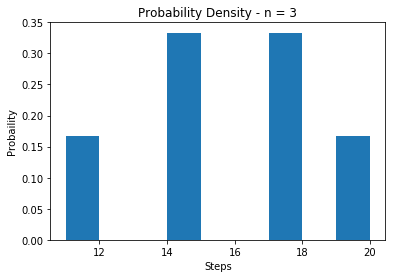


Average Steps: 15.5 - Min Steps: 11.0 - Max Steps: 20.0
Probabilities: 
P(11) = 0.166666666667
P(14) = 0.333333333333
P(17) = 0.333333333333
P(20) = 0.166666666667


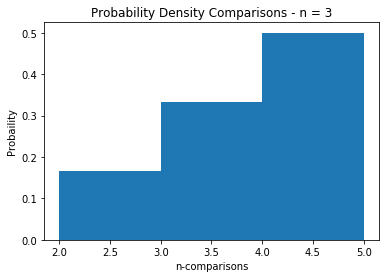


Average Comparisons: 3.5 - Min Comparisons: 2.0 - Max Comparisons: 5.0
Probabilities for Comparisons: 
P(2) = 0.166666666667
P(3) = 0.333333333333
P(4) = 0.333333333333
P(5) = 0.166666666667


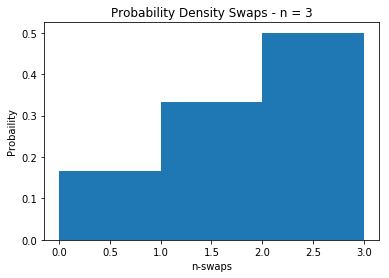


Average Swaps: 1.5 - Min Swaps: 0.0 - Max Swaps: 3.0
Probabilities for Swaps: 
P(0) = 0.166666666667
P(1) = 0.333333333333
P(2) = 0.333333333333
P(3) = 0.166666666667


In [6]:
print(comparaciones)
step_hist(pasos,n_perm)
comp_hist(comparaciones,n_perm)
swap_hist(sw,n_perm)

And for the number of comparisons performed by each number(Note that each value corresponds to [t0 t1 t2 .... tn]):

In [7]:
t_norm = np.empty(n_perm)
for i in range(n_perm):
    print ("Permutation "+ str(perm[i]) +" -> ",t_loop[i])

Permutation [0 1 2] ->  [ 0.  1.  1.]
Permutation [0 2 1] ->  [ 0.  1.  2.]
Permutation [1 0 2] ->  [ 0.  2.  1.]
Permutation [1 2 0] ->  [ 0.  1.  3.]
Permutation [2 0 1] ->  [ 0.  2.  2.]
Permutation [2 1 0] ->  [ 0.  2.  3.]


## Samples
### Random Permutations

Here we test the same, but instead of using all permutations, we decide to take $m$ random permutations of $n$ numbers

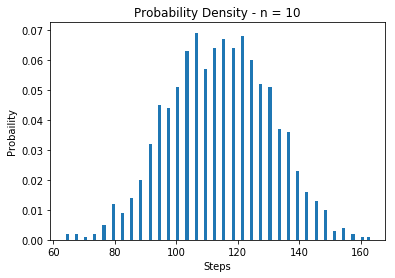


Average Steps: 113.704 - Min Steps: 64.0 - Max Steps: 163.0
Probabilities: 
P(64) = 0.002
P(67) = 0.002
P(70) = 0.001
P(73) = 0.002
P(76) = 0.005
P(79) = 0.012
P(82) = 0.009
P(85) = 0.014
P(88) = 0.02
P(91) = 0.032
P(94) = 0.045
P(97) = 0.044
P(100) = 0.051
P(103) = 0.063
P(106) = 0.069
P(109) = 0.057
P(112) = 0.064
P(115) = 0.067
P(118) = 0.064
P(121) = 0.068
P(124) = 0.06
P(127) = 0.052
P(130) = 0.051
P(133) = 0.037
P(136) = 0.036
P(139) = 0.023
P(142) = 0.016
P(145) = 0.013
P(148) = 0.01
P(151) = 0.003
P(154) = 0.004
P(157) = 0.002
P(160) = 0.001
P(163) = 0.001


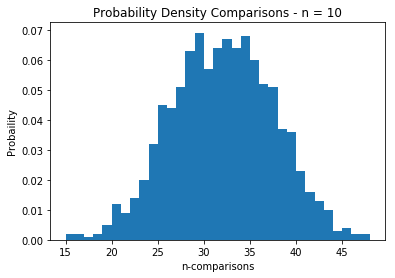


Average Comparisons: 31.568 - Min Comparisons: 15.0 - Max Comparisons: 48.0
Probabilities for Comparisons: 
P(15) = 0.002
P(16) = 0.002
P(17) = 0.001
P(18) = 0.002
P(19) = 0.005
P(20) = 0.012
P(21) = 0.009
P(22) = 0.014
P(23) = 0.02
P(24) = 0.032
P(25) = 0.045
P(26) = 0.044
P(27) = 0.051
P(28) = 0.063
P(29) = 0.069
P(30) = 0.057
P(31) = 0.064
P(32) = 0.067
P(33) = 0.064
P(34) = 0.068
P(35) = 0.06
P(36) = 0.052
P(37) = 0.051
P(38) = 0.037
P(39) = 0.036
P(40) = 0.023
P(41) = 0.016
P(42) = 0.013
P(43) = 0.01
P(44) = 0.003
P(45) = 0.004
P(46) = 0.002
P(47) = 0.001
P(48) = 0.001


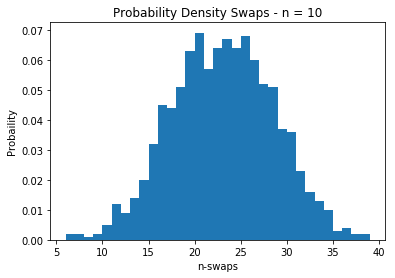


Average Swaps: 22.568 - Min Swaps: 6.0 - Max Swaps: 39.0
Probabilities for Swaps: 
P(6) = 0.002
P(7) = 0.002
P(8) = 0.001
P(9) = 0.002
P(10) = 0.005
P(11) = 0.012
P(12) = 0.009
P(13) = 0.014
P(14) = 0.02
P(15) = 0.032
P(16) = 0.045
P(17) = 0.044
P(18) = 0.051
P(19) = 0.063
P(20) = 0.069
P(21) = 0.057
P(22) = 0.064
P(23) = 0.067
P(24) = 0.064
P(25) = 0.068
P(26) = 0.06
P(27) = 0.052
P(28) = 0.051
P(29) = 0.037
P(30) = 0.036
P(31) = 0.023
P(32) = 0.016
P(33) = 0.013
P(34) = 0.01
P(35) = 0.003
P(36) = 0.004
P(37) = 0.002
P(38) = 0.001
P(39) = 0.001


In [8]:
#function with random permutations
def r_calc(n,m): #n numbers, m permutations
    #Generate permutations lenght n
    perm = np.array([np.random.permutation(n) for i in range(m)])
    n_perm=m
    pasos = np.empty(n_perm)
    comparaciones = np.empty(n_perm)
    sw = np.empty(n_perm)
    t_loop=np.empty([n_perm,n])
    for i in range (n_perm):
        tm = np.copy(perm[i])
        A,steps,comps,swaps,t = in_sort_Mod(tm,n)
        pasos[i]=steps
        comparaciones[i]=comps
        sw[i]=swaps
        t_loop[i] = t
    return pasos,comparaciones,sw,t_loop,perm,n_perm

#Call the function
n,m = 10,1000
pasos,comparaciones,sw,t_loop,perm,n_perm = r_calc(n,m)

step_hist(pasos,n_perm)
comp_hist(comparaciones,n_perm)
swap_hist(sw,n_perm)